# Spotify Top Songs 

Source - https://www.kaggle.com/datasets/julianoorlandi/spotify-top-songs-and-audio-features/data

This dataset contains information about all the songs that were in Spotify top 200 charts since 2016. In addition to the number of streams and the number of weeks in the charts, it contains information about the audio features of each track, such as tempo, key and danceability. The source of this technical information is the Spotify web API. More details about the construction of this dataset can be found at: https://github.com/JulianoOrlandi/Spotify_Top_Songs_and_Audio_Features.

In [1]:
# importing important libraries and modules
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 11

In [2]:
# Loading the csv file
spotify_raw_df = pd.read_csv("./spotify_top_songs_audio_features.csv")

In [3]:
spotify_raw_df

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532
6509,7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635
6510,7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939
6511,7zvfDihYiJ8RQ1nRcpKBF5,"Kendrick Lamar, Tanna Leone",Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,0.3120,0.28300,0.000028,0.3920,0.258,-8.616,174.025,210841,1,12872010


In [4]:
spotify_raw_df.shape

(6513, 19)

This dataset contains 6513 rows and 19 columns of spotify top 200 songs data from the year 2016 to Feb 2024 which contains different information about the song.

Lets check the list to columns

In [4]:
spotify_raw_df.columns

Index(['id', 'artist_names', 'track_name', 'source', 'key', 'mode',
       'time_signature', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness',
       'tempo', 'duration_ms', 'weeks_on_chart', 'streams'],
      dtype='object')

# Data Preparation and cleaning

This data contains a lot of information that may or may not be usefull for this analysis We've chosen to focus our analysis on a subset of the dataset, excluding columns with data that we find unclear or unfamiliar.



In [6]:
columns = [# Artist names, Track name
            'artist_names', 'track_name',
           #key, mode,
            'key', 'mode', 
           # danceability, energy, 
            'danceability', 'energy', '
           # duration (milisecond), weeks on chart, streams
           'duration_ms', 'weeks_on_chart', 'streams' 
]

In [7]:
# Checking how many columns are selected
len(columns)

10

Out of 19 columns of data we will be performing the analysis on the selected 10 columns

Let's extract a copy of the data from these columns into a new data frame spotify_df. We can continue to modify further without affecting the original data frame.

In [8]:
spotify_df = spotify_raw_df[columns] .copy()
spotify_df

,artist_names,track_name,key,mode,danceability,energy,acousticness,duration_ms,weeks_on_chart,streams
0,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),G,Major,0.748,0.627,0.13100,188491,17,107527761
1,Alessia Cara,Growing Pains,C#/Db,Minor,0.353,0.755,0.08220,193680,2,9944865
2,The Killers,Mr. Brightside,C#/Db,Major,0.352,0.911,0.00121,222973,125,512388123
3,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),A,Major,0.620,0.625,0.28700,284856,2,11985346
4,"Post Malone, The Weeknd",One Right Now (with The Weeknd),C#/Db,Major,0.687,0.781,0.03610,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...
6508,Taylor Swift,...Ready For It?,D,Major,0.615,0.779,0.06650,208198,1,17583532
6509,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),G,Major,0.767,0.313,0.83800,210907,2,10526635
6510,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,B,Minor,0.924,0.730,0.05250,236666,1,5404939
6511,"Kendrick Lamar, Tanna Leone",Mr. Morale,A,Major,0.727,0.530,0.28300,210841,1,12872010


In [9]:
# Deleting duplicate values and keeping just the first occurence
spotify_df.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

In [10]:
# lets check the list of columns and their data types
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5351 entries, 0 to 6512
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   artist_names    5351 non-null   object 
 1   track_name      5351 non-null   object 
 2   key             5351 non-null   object 
 3   mode            5351 non-null   object 
 4   danceability    5351 non-null   float64
 5   energy          5351 non-null   float64
 6   acousticness    5351 non-null   float64
 7   duration_ms     5351 non-null   int64  
 8   weeks_on_chart  5351 non-null   int64  
 9   streams         5351 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 459.9+ KB


After deleting the duplicate data from the data we can move forward and start doing our analysis

**Lets view some basic statistic about numeric columns**

In [11]:
spotify_df.describe()

,danceability,energy,acousticness,duration_ms,weeks_on_chart,streams
count,5351.000000,5351.000000,5351.000000,5351.000000,5351.000000,5.351000e+03
mean,0.682207,0.636045,0.237837,203212.322557,11.923192,9.899704e+07
std,0.141714,0.165931,0.244818,50216.186491,21.871261,2.157284e+08
min,0.150000,0.027900,0.000008,30133.000000,1.000000,2.525159e+06
25%,0.592000,0.533000,0.045950,173193.500000,1.000000,8.064482e+06
50%,0.699000,0.650000,0.145000,198614.000000,4.000000,2.396247e+07
75%,0.786500,0.760000,0.363000,227188.500000,13.000000,8.714905e+07
max,0.985000,0.989000,0.994000,690732.000000,363.000000,3.528450e+09


# Exploratory Analysis and Visualization

Lets start by analysing the given data in a simple way

**Which songs have been on the top 200 chart for highest time?(top 15)**

In [12]:
stayed_on_top = spotify_df[["artist_names","track_name","weeks_on_chart"]].sort_values(by = "weeks_on_chart",ascending = False).head(15)

stayed_on_top

,artist_names,track_name,weeks_on_chart
748,Ed Sheeran,Perfect,363
6383,Ed Sheeran,Shape of You,333
752,"Billie Eilish, Khalid",lovely (with Khalid),308
4946,James Arthur,Say You Won't Let Go,297
370,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,275
5554,Travis Scott,goosebumps,238
435,The Weeknd,Blinding Lights,224
6318,XXXTENTACION,Jocelyn Flores,217
5356,"The Chainsmokers, Coldplay",Something Just Like This,198
2043,The Neighbourhood,Sweater Weather,185


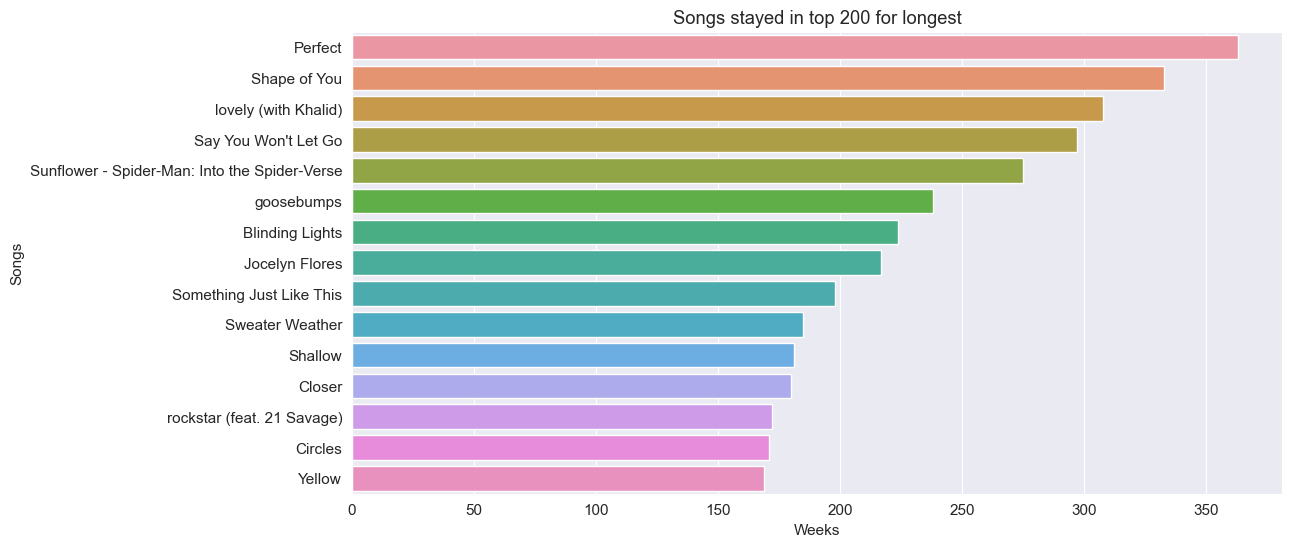

In [13]:
#creating a bar chart for the same to see the difference 
plt.figure(figsize = (12,6))
sns.barplot(x= stayed_on_top.weeks_on_chart , y= stayed_on_top.track_name)
plt.title("Songs stayed in top 200 for longest")
plt.xlabel('Weeks')
plt.ylabel("Songs");

In [15]:
#To get the artist name
stayed_on_top.artist_names[stayed_on_top['track_name']=='Perfect']

748    Ed Sheeran
Name: artist_names, dtype: object

"Perfect" by Ed Sheeran has maintained its position on the top 200 chart for an impressive 363 weeks, making it one of the longest-standing songs on the list. Following closely behind is "Shape of you" which is also by Ed Sheeran, enjoyed significant popularity, staying on the chart for 333 weeks. Both songs have demonstrated remarkable longevity, captivating audiences with their enduring appeal. 
The song "One Dance" by Drake, Wizkid, and Kyla ranks 15th for being on the top 200 chart for the longest duration, has been featured for 185 weeks. This duration amounts to nearly half of the time that "Perfect" has spent on the same chart.

**Now lets check out the 15 most streamed song of all time**

**Note** - The accuracy of the data could be affected because of the absence of time data. A song's popularity in streaming might be influenced by the year of its release, thus impacting the analysis accuracy.

In [18]:
top_streams = spotify_df[["artist_names","track_name","streams"]].sort_values(by = "streams",ascending = False).head(15)
top_streams

,artist_names,track_name,streams
435,The Weeknd,Blinding Lights,3528450184
6383,Ed Sheeran,Shape of You,3509169565
748,Ed Sheeran,Perfect,2797600939
3523,Harry Styles,As It Was,2580052047
752,"Billie Eilish, Khalid",lovely (with Khalid),2417312282
33,Glass Animals,Heat Waves,2265473708
1530,Tones And I,Dance Monkey,2250351787
2043,The Neighbourhood,Sweater Weather,2095120431
370,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2063374994
4946,James Arthur,Say You Won't Let Go,1959283644


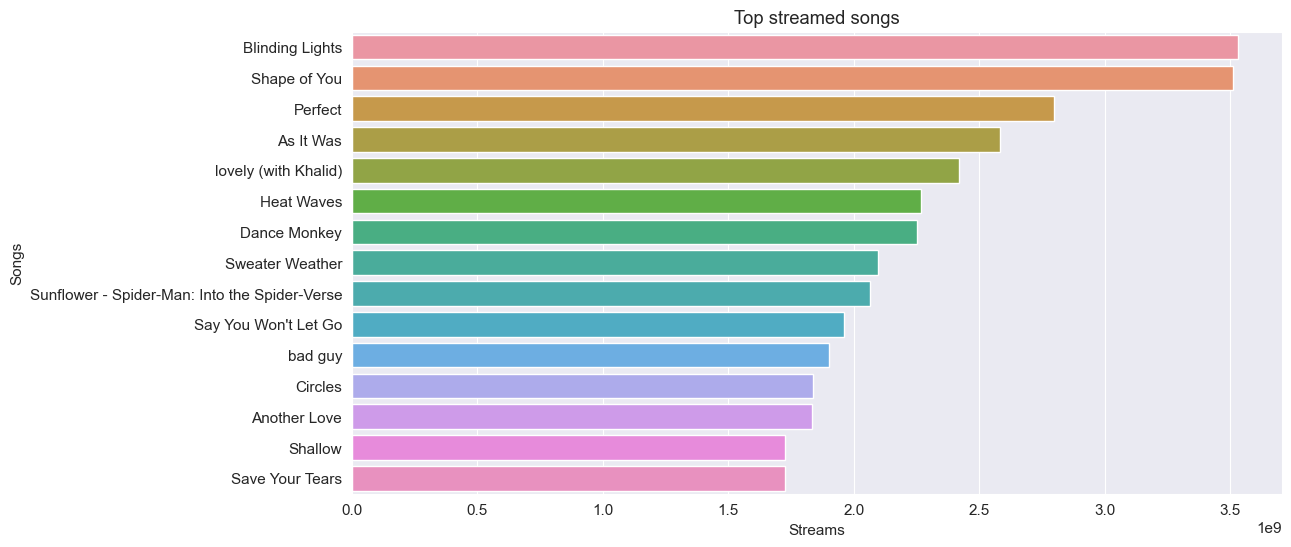

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(x= top_streams.streams , y= top_streams.track_name)
plt.title("Top streamed songs")
plt.xlabel('Streams')
plt.ylabel("Songs");

"Blinding Lights" by The Weeknd, the most streamed song, closely rivals the second most streamed track, "Shape of You" by Ed Sheeran. However, "Blinding Lights" significantly outpaces "Save Your Tears," another hit by The Weeknd, in terms of streaming numbers.

**Q. Lets explore if there is a connection between songs with the longest tenure on the list and those with the highest streaming counts.**

In [20]:
Relation = stayed_on_top['track_name'].isin(top_streams['track_name'])
Relation.index = stayed_on_top['track_name']
Relation

track_name
Perfect                                           True
Shape of You                                      True
lovely (with Khalid)                              True
Say You Won't Let Go                              True
Sunflower - Spider-Man: Into the Spider-Verse     True
goosebumps                                       False
Blinding Lights                                   True
Jocelyn Flores                                   False
Something Just Like This                         False
Sweater Weather                                   True
Shallow                                           True
Closer                                           False
rockstar (feat. 21 Savage)                       False
Circles                                           True
Yellow                                           False
Name: track_name, dtype: bool

Let's explore the songs that have consistently appeared on the top 200 chart and also feature in the top 15 streamed songs list.

In [21]:
#counting true values
Relation.sum()

9

Out of the 15 songs examined, 9 of them, which have spent the most time on the top 200 chart, are also present on the list of top streamed songs. This suggests a positive correlation between a song's presence on the top 200 chart and its streaming popularity. In other words, songs that have been on the top 200 chart for a longer timeframe are more likely to be streamed frequently by listeners.

**Let's explore the artist who has had the highest number of songs featured on the top 200 chart since 2016.**

In [22]:
most_songs = spotify_df.artist_names.value_counts().head(15)
most_songs

artist_names
Taylor Swift     159
Drake             91
Bad Bunny         64
BTS               57
Ariana Grande     51
Juice WRLD        43
Kanye West        43
Billie Eilish     42
The Weeknd        41
Ed Sheeran        37
Post Malone       37
Lil Uzi Vert      37
XXXTENTACION      36
Harry Styles      34
Eminem            31
Name: count, dtype: int64

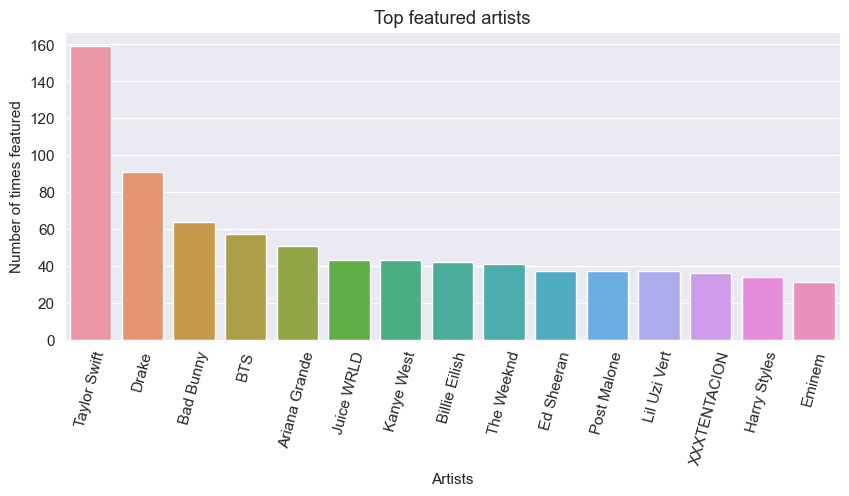

In [23]:
plt.figure(figsize = (10,4))
sns.barplot(x=most_songs.index , y=most_songs);
plt.title("Top featured artists")
plt.xlabel('Artists')
plt.ylabel("Number of times featured")
plt.xticks(rotation = 75);

Taylor Swift has dominated the top 200 chart, featuring for the most time,which shows her popularity. The margin between her and the second most featured artist, Drake, is considerable. After them, the other artists on this list have featured for nearly the same amount of time.

**Lets check out in which key most of the songs in top 200 chart are played in**

In [24]:
top_key = spotify_df.key.value_counts().head(5).to_frame()
top_key

,count
key,
C#/Db,779
C,583
G,505
G#/Ab,455
B,444


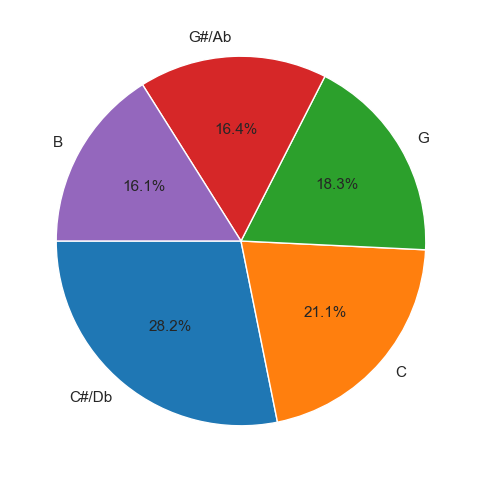

In [25]:
plt.figure(figsize = (12,6))
plt.pie(top_key['count'],labels = top_key.index, autopct = '%1.1f%%', startangle = 180);

A significant portion of the songs that have maintained their presence on the top 200 chart since 2016 are characterized by certain keys, with approximately 28% being in the key of C#Db. Notably, nearly half of the songs belong to either the C#Db or C keys out of the 5 most used keys.

**Lets see if there is a relation between the top streamed songs and the key used in those songs**

In [27]:
top_streams_key = spotify_df[["artist_names","track_name","streams","key"]].sort_values(by = "streams",ascending = False).head(15)
top_streams_key

,artist_names,track_name,streams,key
435,The Weeknd,Blinding Lights,3528450184,C#/Db
6383,Ed Sheeran,Shape of You,3509169565,C#/Db
748,Ed Sheeran,Perfect,2797600939,G#/Ab
3523,Harry Styles,As It Was,2580052047,F#/Gb
752,"Billie Eilish, Khalid",lovely (with Khalid),2417312282,E
33,Glass Animals,Heat Waves,2265473708,B
1530,Tones And I,Dance Monkey,2250351787,F#/Gb
2043,The Neighbourhood,Sweater Weather,2095120431,A#/Bb
370,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2063374994,D
4946,James Arthur,Say You Won't Let Go,1959283644,A#/Bb


We will left join the most used key list with the top streamed songs on the basis of keys used

In [28]:
top_key = top_key.merge(top_streams_key[['artist_names',"track_name","streams",'key']], on='key',how = 'left')

In [29]:
top_key

,key,count,artist_names,track_name,streams
0,C#/Db,779,The Weeknd,Blinding Lights,3528450184
1,C#/Db,779,Ed Sheeran,Shape of You,3509169565
2,C,583,Post Malone,Circles,1835517061
3,C,583,The Weeknd,Save Your Tears,1723652960
4,G,505,Billie Eilish,bad guy,1900912195
5,G,505,"Lady Gaga, Bradley Cooper",Shallow,1726357738
6,G#/Ab,455,Ed Sheeran,Perfect,2797600939
7,B,444,Glass Animals,Heat Waves,2265473708


In [30]:
perc= round(top_key['key'].count()*100/15,2) 
print(perc,'%')

53.33 %


Out of the top 15 streamed songs 53% songs used the keys that were used by most of the songs in the chart, also the top 2 streamed songs used the C#Db key, which was the most used key.This suggests a potential alignment in the preferences of both audiences and music producers towards songs composed in these keys.Such consistency may imply a lasting impact of these keys on the music industry, where certain tonalities continue to resonate widely with listeners even after their initial chart presence

**Lets study danceability energy speechiness acousticness**

Let's categorize the danceability values into low, medium, and high.

In [34]:
spotify_df["danceability_amt"] = ''
for index, value in spotify_df["danceability"].items():
    
    if value <= 0.3:
        spotify_df.at[index,"danceability_amt"] = "Low"
    
    elif value > 0.3 and value <= 0.6:
        spotify_df.at[index,"danceability_amt"] = "Medium"
    
    elif value > 0.6:
        spotify_df.at[index,"danceability_amt"] = "High"


In [35]:
dance_count = spotify_df.danceability_amt.value_counts()
dance_count


danceability_amt
High      3926
Medium    1387
Low         38
Name: count, dtype: int64

<BarContainer object of 3 artists>

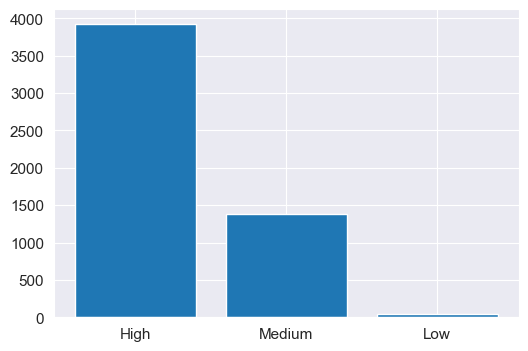

In [38]:
plt.figure(figsize= (6,4))
plt.bar(dance_count.index, dance_count)

The majority of songs appearing on the top 200 chart exhibit high or medium danceability. A song with high danceability is more likely to secure a spot on the top 200 chart.

In [80]:
spotify_df["energy_amt"] = ''
for index, value in spotify_df["acousticness"].items():
    
    if value <= 0.1:
        spotify_df.at[index,"energy_amt"] = "Low"
    
    elif value > 0.1 and value <= 0.4:
        spotify_df.at[index,"energy_amt"] = "Medium"
    
    elif value > 0.4:
        spotify_df.at[index,"energy_amt"] = "High"


In [88]:
energy_count = spotify_df.energy_amt.value_counts()
energy_count

energy_amt
Low       2160
Medium    2003
High      1188
Name: count, dtype: int64

<BarContainer object of 3 artists>

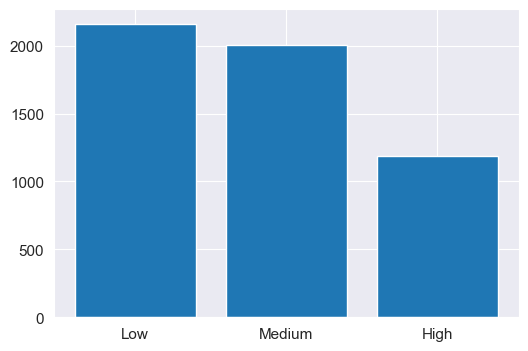

In [89]:
plt.figure(figsize= (6,4))
plt.bar(energy_count.index, energy_count)

Based on the distribution of energy levels among the songs that have been in the top 200 chart, we can observe that a significant portion of these songs have a "Low" or "Medium" energy level, with a smaller proportion falling into the "High" energy level category. This suggests that songs with lower to moderate energy levels are more prevalent among the top 200 chart. It may indicate that audiences gravitate towards songs with a more subdued or balanced energy profile, rather than those with consistently high energy throughout.

We'll analyze this data alongside the top 50 songs that have maintained their position on the top 200 chart for the longest duration to identify any correlations or patterns.

In [90]:
top_energy = spotify_df[["artist_names","track_name","weeks_on_chart",'energy_amt']].sort_values(by = "weeks_on_chart",ascending = False).head(50)
top_energy

,artist_names,track_name,weeks_on_chart,energy_amt
748,Ed Sheeran,Perfect,363,Medium
6383,Ed Sheeran,Shape of You,333,High
752,"Billie Eilish, Khalid",lovely (with Khalid),308,High
4946,James Arthur,Say You Won't Let Go,297,High
370,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,275,High
5554,Travis Scott,goosebumps,238,Low
435,The Weeknd,Blinding Lights,224,Low
6318,XXXTENTACION,Jocelyn Flores,217,High
5356,"The Chainsmokers, Coldplay",Something Just Like This,198,Low
2043,The Neighbourhood,Sweater Weather,185,Low


<BarContainer object of 3 artists>

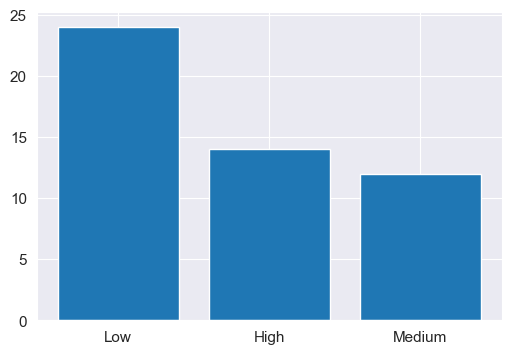

In [100]:
plt.figure(figsize= (6,4))
plt.bar(top_energy.energy_amt.value_counts().index, top_energy.energy_amt.value_counts())

We can interpret that among the top 50 songs that have stayed on the top 200 charts for the longest duration, a significant portion consists of songs with low energy levels, followed by those with high energy levels and a relatively smaller number of songs with medium energy levels. This suggests that songs with lower energy levels tend to have more enduring popularity on the charts compared to those with higher energy levels.

**Note**- Given that we lack access to individual preference data, it's essential to consider that there could be additional factors influencing the top streamed songs beyond the ones we've analyzed.